**Titanic is one of the most big disaster in the history in 1912. It sank after hitting the iceberg. 2224 passengers and employees are died.**

In [271]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import os
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [272]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
test_PassengerID=test_df['PassengerId']

In [273]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

=>>> There are total 12 columns.

In [274]:
train_df.head(16)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,NaN,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458299999999999,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000000000000,0,0,17463,51.862499999999997,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000000000000,3,1,349909,21.074999999999999,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000000000000,0,2,347742,11.133300000000000,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000000000000,1,0,237736,30.070799999999998,NaN,C


In [275]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000000000000,0,0,211536,13.000000000000000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000000000000,0,0,112053,30.000000000000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.449999999999999,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000000000000,0,0,111369,30.000000000000000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000000000000,0,0,370376,7.750000000000000,NaN,Q


In [276]:
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,NaN,S
1,2,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C85,C
2,3,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,NaN,S
3,4,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,C123,S
4,5,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,nan,3,"Spector, Mr. Woolf",male,nan,0,0,A.5. 3236,8.050000000000001,NaN,S
1305,1306,nan,1,"Oliva y Ocana, Dona. Fermina",female,39.000000000000000,0,0,PC 17758,108.900000000000006,C105,C
1306,1307,nan,3,"Saether, Mr. Simon Sivertsen",male,38.500000000000000,0,0,SOTON/O.Q. 3101262,7.250000000000000,NaN,S
1307,1308,nan,3,"Ware, Mr. Frederick",male,nan,0,0,359309,8.050000000000001,NaN,S


In [277]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000000000000,891.000000000000000,1309.000000000000000,1046.000000000000000,1309.000000000000000,1309.000000000000000,1308.000000000000000
mean,655.000000000000000,0.383838383838384,2.294881588999236,29.881137667304014,0.498854087089381,0.385026737967914,33.295479281345600
std,378.020061196051699,0.486592454264858,0.837836018970132,14.413493211271334,1.041658390596098,0.865560275349513,51.758668239174142
min,1.000000000000000,0.000000000000000,1.000000000000000,0.170000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,328.000000000000000,0.000000000000000,2.000000000000000,21.000000000000000,0.000000000000000,0.000000000000000,7.895800000000000
50%,655.000000000000000,0.000000000000000,3.000000000000000,28.000000000000000,0.000000000000000,0.000000000000000,14.454200000000000
75%,982.000000000000000,1.000000000000000,3.000000000000000,39.000000000000000,1.000000000000000,0.000000000000000,31.274999999999999
max,1309.000000000000000,1.000000000000000,3.000000000000000,80.000000000000000,8.000000000000000,9.000000000000000,512.329200000000014


=>>> mean and %50 value of Age are so similar. It likes normal distribution.

=>>> mean and %50 value of Pclass are a little similar.

=>>> mean and %50 value of Fare are not so similar. Positively skewed distribution.

In [278]:
# show the overall survival rate, as the standard when choosing the fts
print('Overall Survival Ratio: %{}'.format(train_df['Survived'].mean()*100))

Overall Survival Ratio: %38.38383838383838


In [279]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


=>>> Dataset has 5 objects, 5 integer, and 2 float columns.

float64 : Fare and Age

int64: Pclass,SibSp, Parch, PassengerID, and Survived

object : Name, Sex, Ticket, Cabin, and Embarked

In [280]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [281]:
train_df.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

**Categorical Variable Analysis** : Survived, Pclass, Sex, SibsSp, Parch, Embarked, Cabin, Name, Ticket

**Numerical Variable Analysis** : Age, PassengerID, Fare

**Categorical Variable Analysis**

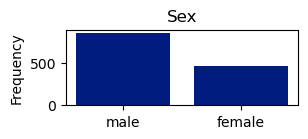

Sex: 
 male      843
female    466
Name: Sex, dtype: int64


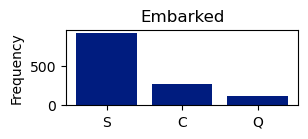

Embarked: 
 S    914
C    270
Q    123
Name: Embarked, dtype: int64


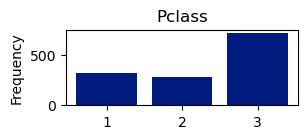

Pclass: 
 3    709
1    323
2    277
Name: Pclass, dtype: int64


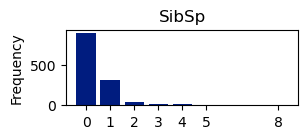

SibSp: 
 0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


In [282]:
def bar_plot(i):
    var= train_df[i]
    varValue=var.value_counts()
    plt.figure(figsize=(3,1))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(i)
    plt.show()
    print('{}: \n {}'.format(i,varValue))
Firstcategory=[ 'Sex', 'Embarked', 'Pclass', 'SibSp']
for c in Firstcategory:
    bar_plot(c)

In [283]:
Secondcategory=['Cabin', 'Name', 'Ticket']
for c in Secondcategory:
    print('{} \n'.format(train_df[c].value_counts()))

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
B96 B98            4
F2                 4
                  ..
E58                1
D46                1
E38                1
D6                 1
C111               1
Name: Cabin, Length: 186, dtype: int64 

Kelly, Mr. James                                 2
Connolly, Miss. Kate                             2
Kenyon, Mrs. Frederick R (Marion)                1
Arnold-Franchi, Mrs. Josef (Josefine Franchi)    1
Johansson Palmquist, Mr. Oskar Leander           1
                                                ..
McGowan, Miss. Katherine                         1
Skoog, Mr. Wilhelm                               1
Zakarian, Mr. Ortin                              1
Reeves, Mr. David                                1
McGovern, Miss. Mary                             1
Name: Name, Length: 1307, dtype: int64 

CA. 2343        11
CA 2144          8
1601             8
S.O.C. 14879     7
PC 17608         7
                ..
349217      

**Numerical Variable Analysis**

Text(0.5, 1.0, 'PassengerID')

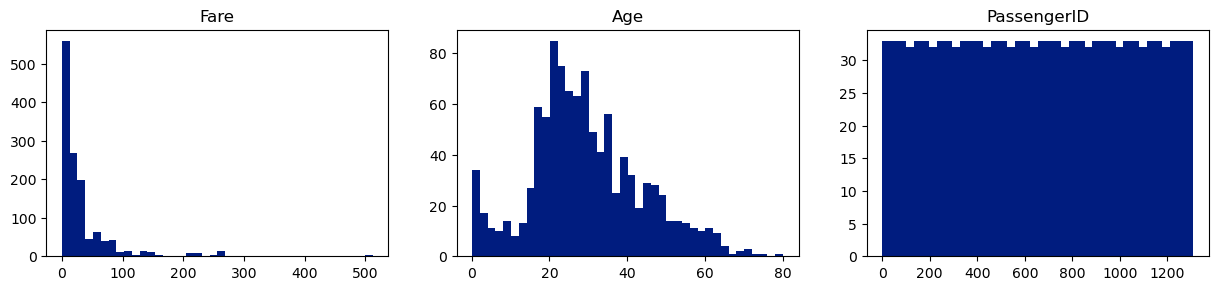

In [284]:
plt.figure(figsize = (15,3))
plt.subplot(1,3,1)
plt.hist(train_df['Fare'], bins=40)
plt.title("Fare")
plt.subplot(1,3,2)
plt.hist(train_df['Age'], bins=40)
plt.title("Age")
plt.subplot(1,3,3)
plt.hist(train_df['PassengerId'], bins=40)
plt.title("PassengerID")

In [285]:
#Pclass vs Survived
train_df[['Pclass', 'Survived']]

,Pclass,Survived
0,3,0.000000000000000
1,1,1.000000000000000
2,3,1.000000000000000
3,1,1.000000000000000
4,3,0.000000000000000
...,...,...
1304,3,nan
1305,1,nan
1306,3,nan
1307,3,nan


In [286]:
#Survived people ratio groupby Pclass:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629629629629630
1,2,0.472826086956522
2,3,0.242362525458248


=>>>> Higher ratio of survived people, lower pclass.

In [287]:
#Survived people ratio groupby Sex:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038216560510
1,male,0.188908145580589


=>>> Number of survived female passengers are more than survived male passenger.

In [288]:
#Survived people ratio groupby Siblings/Spouse :
sursibsp=train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sursibsp

,SibSp,Survived
1,1,0.535885167464115
2,2,0.464285714285714
0,0,0.345394736842105
3,3,0.250000000000000
4,4,0.166666666666667
5,5,0.000000000000000
6,8,0.000000000000000


=>>> Passengers who have 1 sibling/suppose have the most value of survived rate. Passengers that have 5 or 8 sibsp are not survived or there is no possibility of having sibsp.

In [289]:
#Survived people ratio groupby Parch ( Parent or children) : 
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000000000000
1,1,0.550847457627119
2,2,0.500000000000000
0,0,0.343657817109145
5,5,0.200000000000000
4,4,0.000000000000000
6,6,0.000000000000000
7,9,nan


=>>> If a passenger has 3 children or parents, the survived rate is highest.

**Outlier Detection**

**Missing Value**

Find and fill the missing value:

In [290]:
train_df.drop(labels = ["Cabin"], axis = 1, inplace = True)

In [291]:
#Finding missing values:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Embarked'], dtype='object')

In [292]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000000000000,-0.005006660767066,-0.038354378168912,0.028814450421119,-0.055223953254582,0.008942080057921,0.031428481104193
Survived,-0.005006660767066,1.000000000000000,-0.338481035961016,-0.077221094572177,-0.035322498885736,0.081629407083482,0.257306522384962
Pclass,-0.038354378168912,-0.338481035961016,1.000000000000000,-0.408106234236445,0.060832007574908,0.018322202009787,-0.558628732327172
Age,0.028814450421119,-0.077221094572177,-0.408106234236445,1.000000000000000,-0.243698997664770,-0.150917090363543,0.178739855999641
SibSp,-0.055223953254582,-0.035322498885736,0.060832007574908,-0.243698997664770,1.000000000000000,0.373587190626489,0.160238255914952
Parch,0.008942080057921,0.081629407083482,0.018322202009787,-0.150917090363543,0.373587190626489,1.000000000000000,0.221538658548192
Fare,0.031428481104193,0.257306522384962,-0.558628732327172,0.178739855999641,0.160238255914952,0.221538658548192,1.000000000000000


In [293]:
#Embarked missing
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1.000000000000000,1,"Icard, Miss. Amelie",female,38.000000000000000,0,0,113572,80.000000000000000,NaN
829,830,1.000000000000000,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000000000000000,0,0,113572,80.000000000000000,NaN


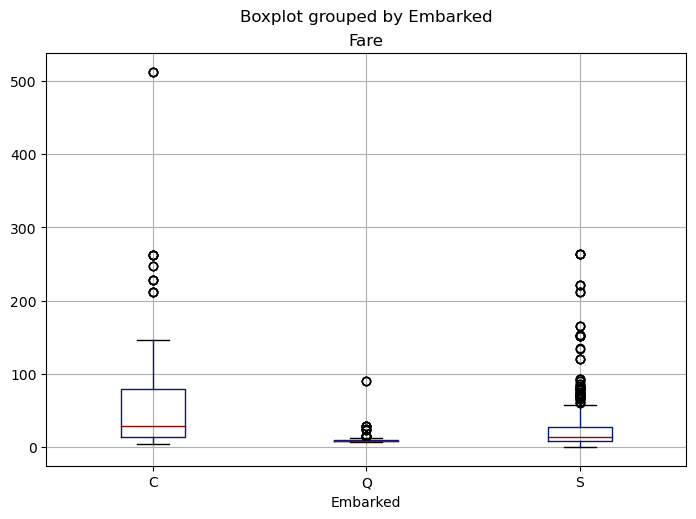

In [294]:
train_df.boxplot(column='Fare', by='Embarked')
plt.show()

=>>> Fare and Embarked are correlated each other. Null value of C embarked has more valur than others.

In [295]:
train_df['Embarked']= train_df['Embarked'].fillna('C')
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [296]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Embarked"])], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,1,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,S,0,0,1
1,2,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C,1,0,0
2,3,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,S,0,0,1
3,4,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,S,0,0,1
4,5,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,S,0,0,1


In [297]:
#Fare missing
train_df[train_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
1043,1044,nan,3,"Storey, Mr. Thomas",male,60.500000000000000,0,0,3701,nan,S,0,0,1


=>>> Only one null value of Fare have 3.Pclass. So it is filled mean of Fare of 3.Pclass.

In [298]:
train_df['Fare']= train_df['Fare'].fillna(np.mean(train_df[train_df['Pclass']==3]['Fare']))
train_df[train_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S


In [299]:
#Age missing
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
5,6,0.000000000000000,3,"Moran, Mr. James",male,nan,0,0,330877,8.458299999999999,Q,0,1,0
17,18,1.000000000000000,2,"Williams, Mr. Charles Eugene",male,nan,0,0,244373,13.000000000000000,S,0,0,1
19,20,1.000000000000000,3,"Masselmani, Mrs. Fatima",female,nan,0,0,2649,7.225000000000000,C,1,0,0
26,27,0.000000000000000,3,"Emir, Mr. Farred Chehab",male,nan,0,0,2631,7.225000000000000,C,1,0,0
28,29,1.000000000000000,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,nan,0,0,330959,7.879200000000000,Q,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,nan,3,"Riordan, Miss. Johanna Hannah""""",female,nan,0,0,334915,7.720800000000000,Q,0,1,0
1301,1302,nan,3,"Naughton, Miss. Hannah",female,nan,0,0,365237,7.750000000000000,Q,0,1,0
1304,1305,nan,3,"Spector, Mr. Woolf",male,nan,0,0,A.5. 3236,8.050000000000001,S,0,0,1
1307,1308,nan,3,"Ware, Mr. Frederick",male,nan,0,0,359309,8.050000000000001,S,0,0,1


In [300]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Sex"])], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S,female,male
0,1,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,S,0,0,1,0,1
1,2,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C,1,0,0,1,0
2,3,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,S,0,0,1,1,0
3,4,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,S,0,0,1,1,0
4,5,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,S,0,0,1,0,1


In [301]:
def make_discrete(SibSp):
    if SibSp <= 1:
        return 0
    else:
        return 1
train_df['SibSp_grup'] = train_df['SibSp'].apply(make_discrete)
display(train_df.head())
train_df.groupby("SibSp_grup")["SibSp"].count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S,female,male,SibSp_grup
0,1,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,S,0,0,1,0,1,0
1,2,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C,1,0,0,1,0,0
2,3,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,S,0,0,1,1,0,0
3,4,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,S,0,0,1,1,0,0
4,5,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,S,0,0,1,0,1,0


SibSp_grup
0    1210
1      99
Name: SibSp, dtype: int64

=>>> 1210 people are only or have 1 sibsp. They must be engaged. So their age filled as 25.

=>>> 99 people have more than 1 sipsp. They must be older.

In [302]:
train_df['Age']= train_df['Age'].fillna(np.mean(train_df["Age"]))
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S,female,male,SibSp_grup


In [303]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
 11  C            1309 non-null   uint8  
 12  Q            1309 non-null   uint8  
 13  S            1309 non-null   uint8  
 14  female       1309 non-null   uint8  
 15  male         1309 non-null   uint8  
 16  SibSp_grup   1309 non-null   int64  
dtypes: float64(3), int64(5), object(4), uint8(5)
memory usage: 129.2+ KB


In [304]:
#Survived missing corralated highly with Pclass
train_df[train_df['Survived'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S,female,male,SibSp_grup
891,892,nan,3,"Kelly, Mr. James",male,34.500000000000000,0,0,330911,7.829200000000000,Q,0,1,0,0,1,0
892,893,nan,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000000000000,1,0,363272,7.000000000000000,S,0,0,1,1,0,0
893,894,nan,2,"Myles, Mr. Thomas Francis",male,62.000000000000000,0,0,240276,9.687500000000000,Q,0,1,0,0,1,0
894,895,nan,3,"Wirz, Mr. Albert",male,27.000000000000000,0,0,315154,8.662500000000000,S,0,0,1,0,1,0
895,896,nan,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000000000000,1,1,3101298,12.287500000000000,S,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,nan,3,"Spector, Mr. Woolf",male,29.881137667304014,0,0,A.5. 3236,8.050000000000001,S,0,0,1,0,1,0
1305,1306,nan,1,"Oliva y Ocana, Dona. Fermina",female,39.000000000000000,0,0,PC 17758,108.900000000000006,C,1,0,0,1,0,0
1306,1307,nan,3,"Saether, Mr. Simon Sivertsen",male,38.500000000000000,0,0,SOTON/O.Q. 3101262,7.250000000000000,S,0,0,1,0,1,0
1307,1308,nan,3,"Ware, Mr. Frederick",male,29.881137667304014,0,0,359309,8.050000000000001,S,0,0,1,0,1,0


In [305]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'C', 'Q', 'S', 'female', 'male',
       'SibSp_grup'],
      dtype='object')

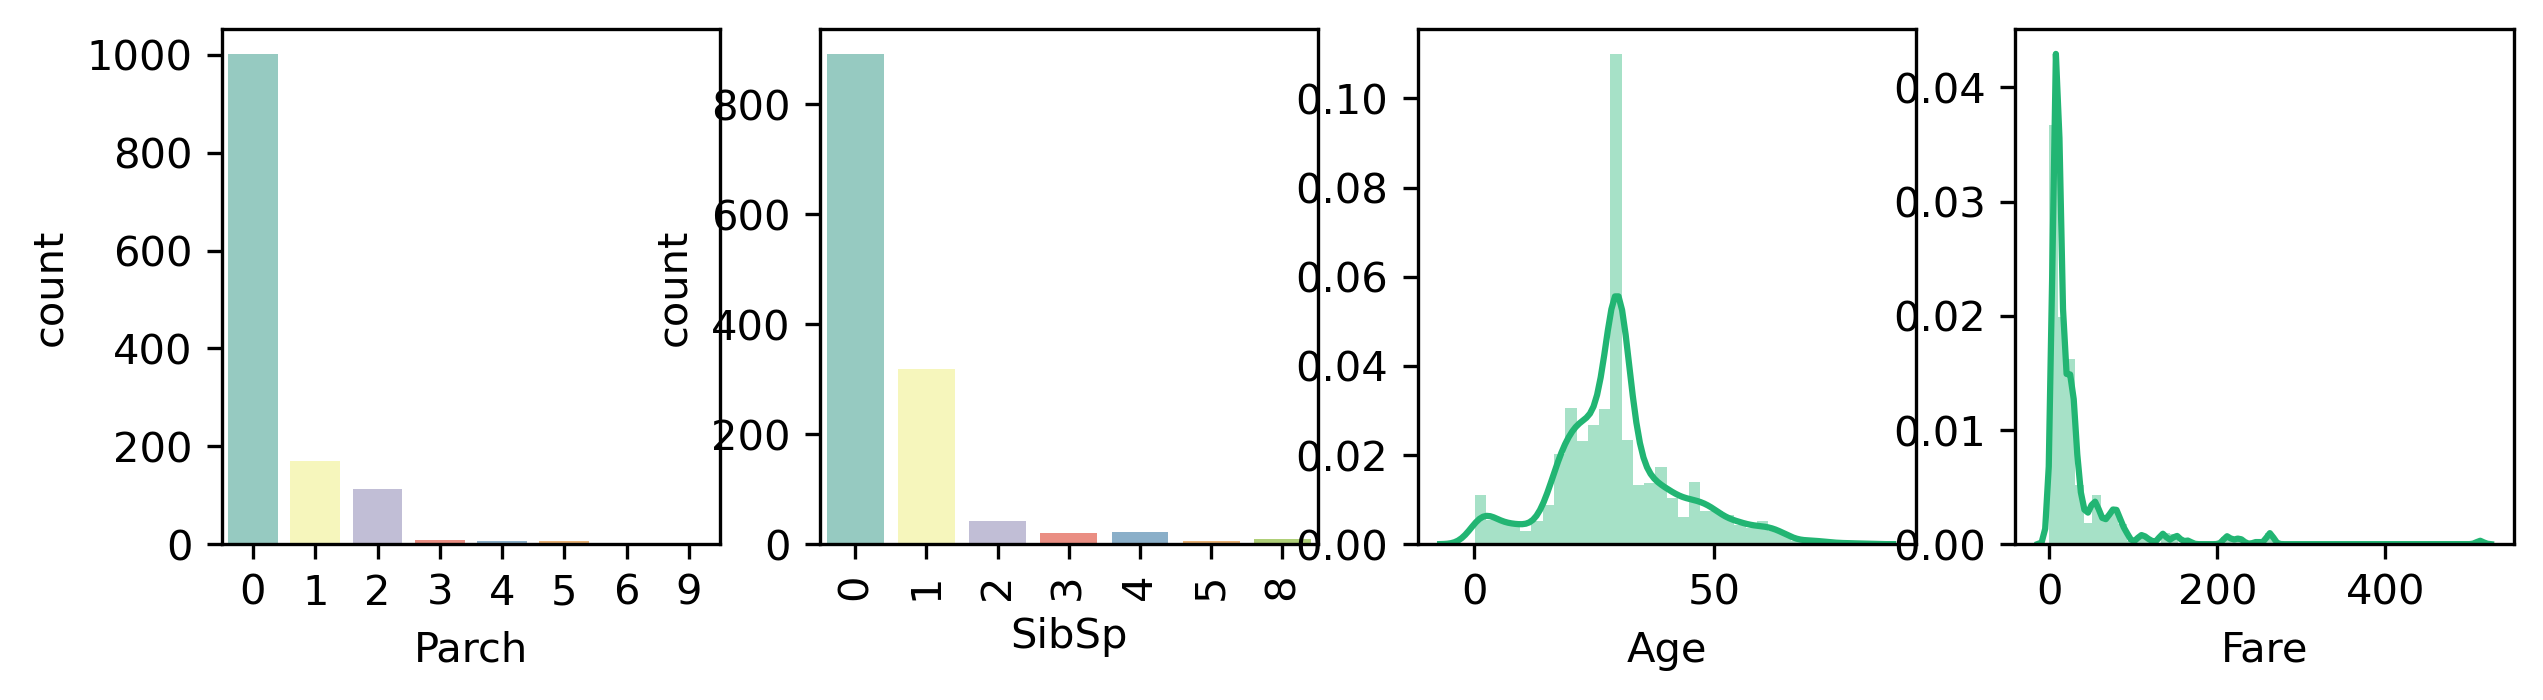

In [306]:
import seaborn as sns
plt.figure(figsize=(15,5), dpi = 300)
plt.subplot(2,6,1)
sns.countplot(x = 'Parch', data = train_df, palette="Set3")
plt.subplot(2,6,2)
sns.countplot(x = 'SibSp', data = train_df, palette="Set3")
plt.xticks(rotation = 90)
plt.subplot(2,6,3)
sns.distplot(train_df.Age, color = '#22B573')
plt.subplot(2,6,4)
sns.distplot(train_df.Fare, color = '#22B573')
plt.show()

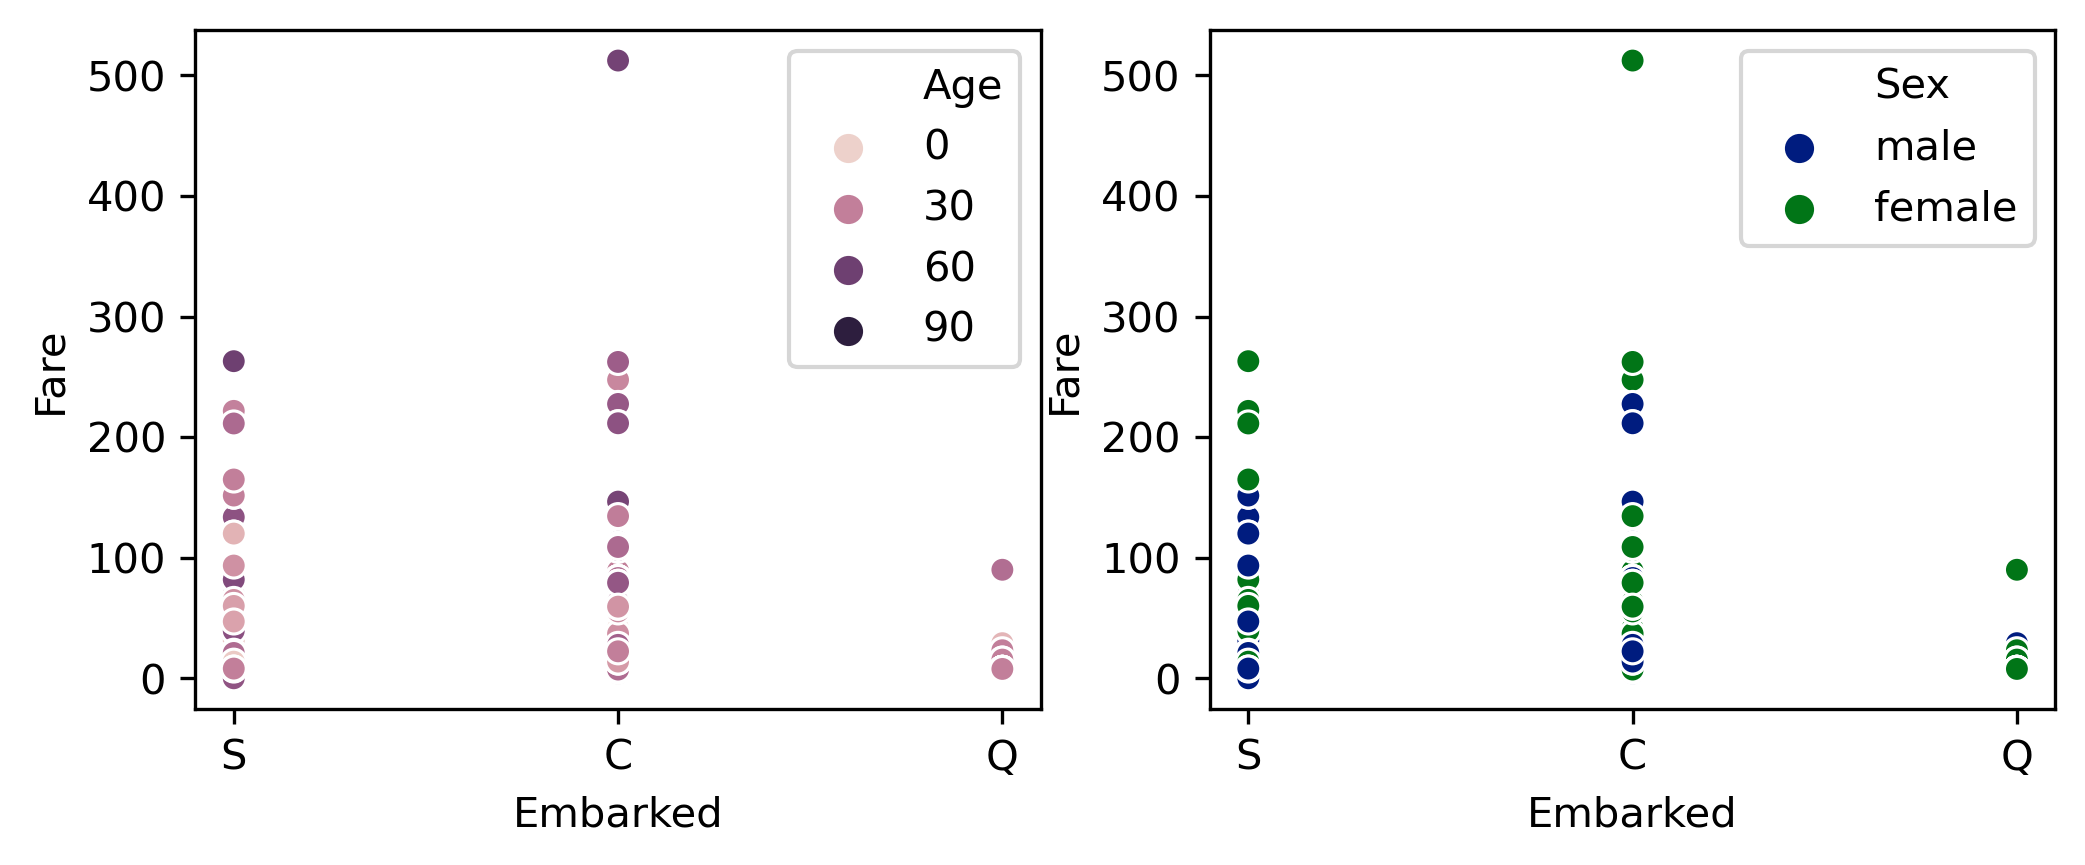

In [307]:
plt.figure(figsize=(8,3), dpi = 300)
plt.subplot(1,2,1)
sns.scatterplot(x="Embarked", y="Fare", data=train_df, hue = 'Age')
plt.subplot(1,2,2)
sns.scatterplot(x="Embarked", y="Fare", data=train_df, hue = 'Sex')

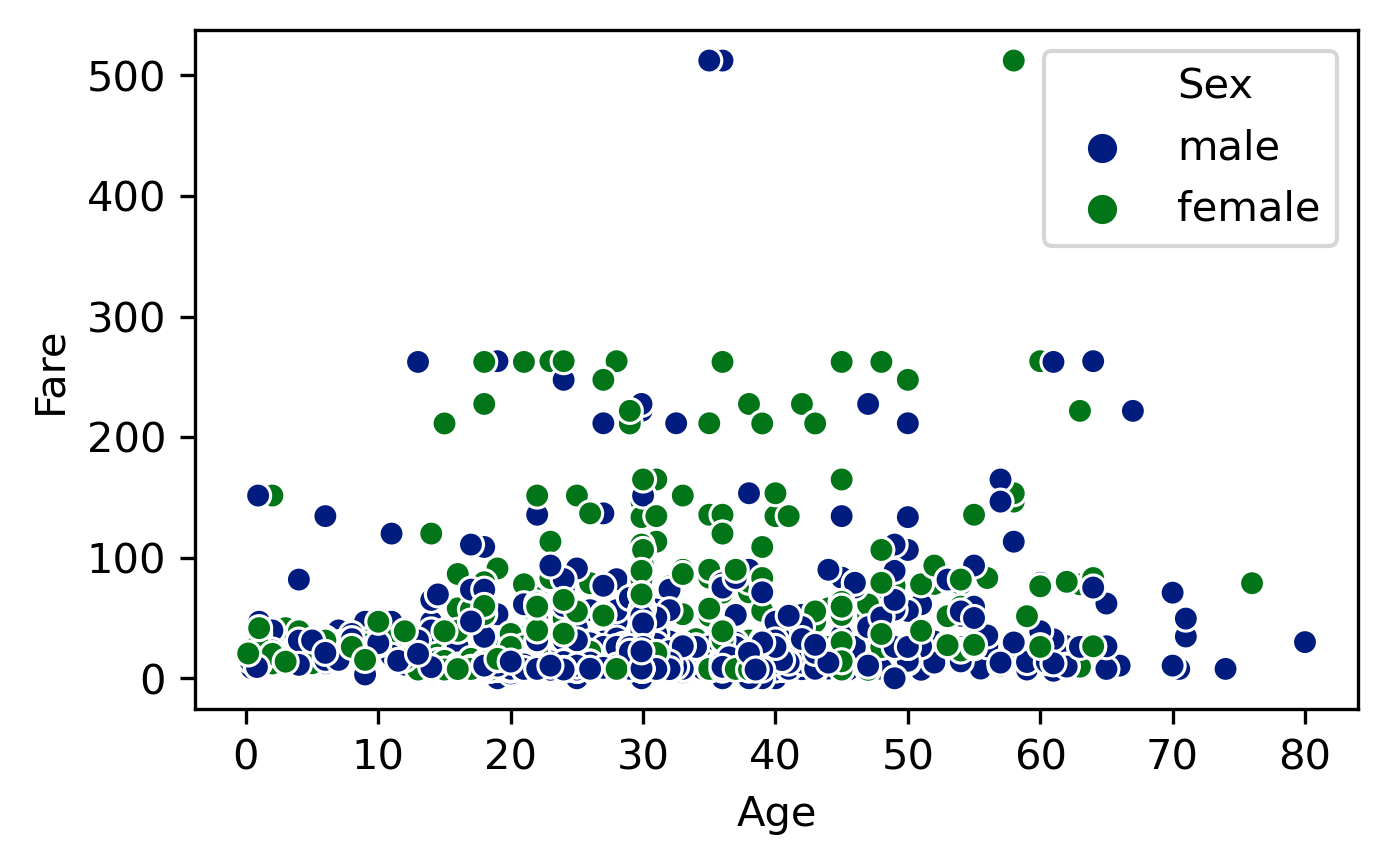

In [308]:
plt.figure(figsize=(5,3), dpi = 300)
sns.scatterplot(x="Age", y="Fare", data=train_df, hue = 'Sex')

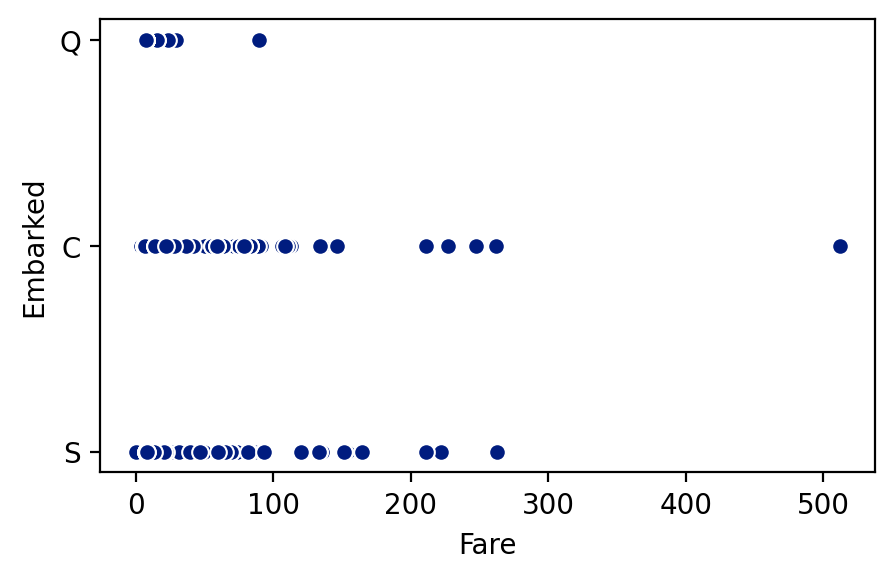

In [309]:
plt.figure(figsize=(5,3), dpi = 200)
a = sns.scatterplot(x="Fare", y="Embarked", data=train_df)
plt.show()

**UNIVARIATE ANALYSIS**

**Visualization with Univariate Data**\
Visualization of the Numerical Variables

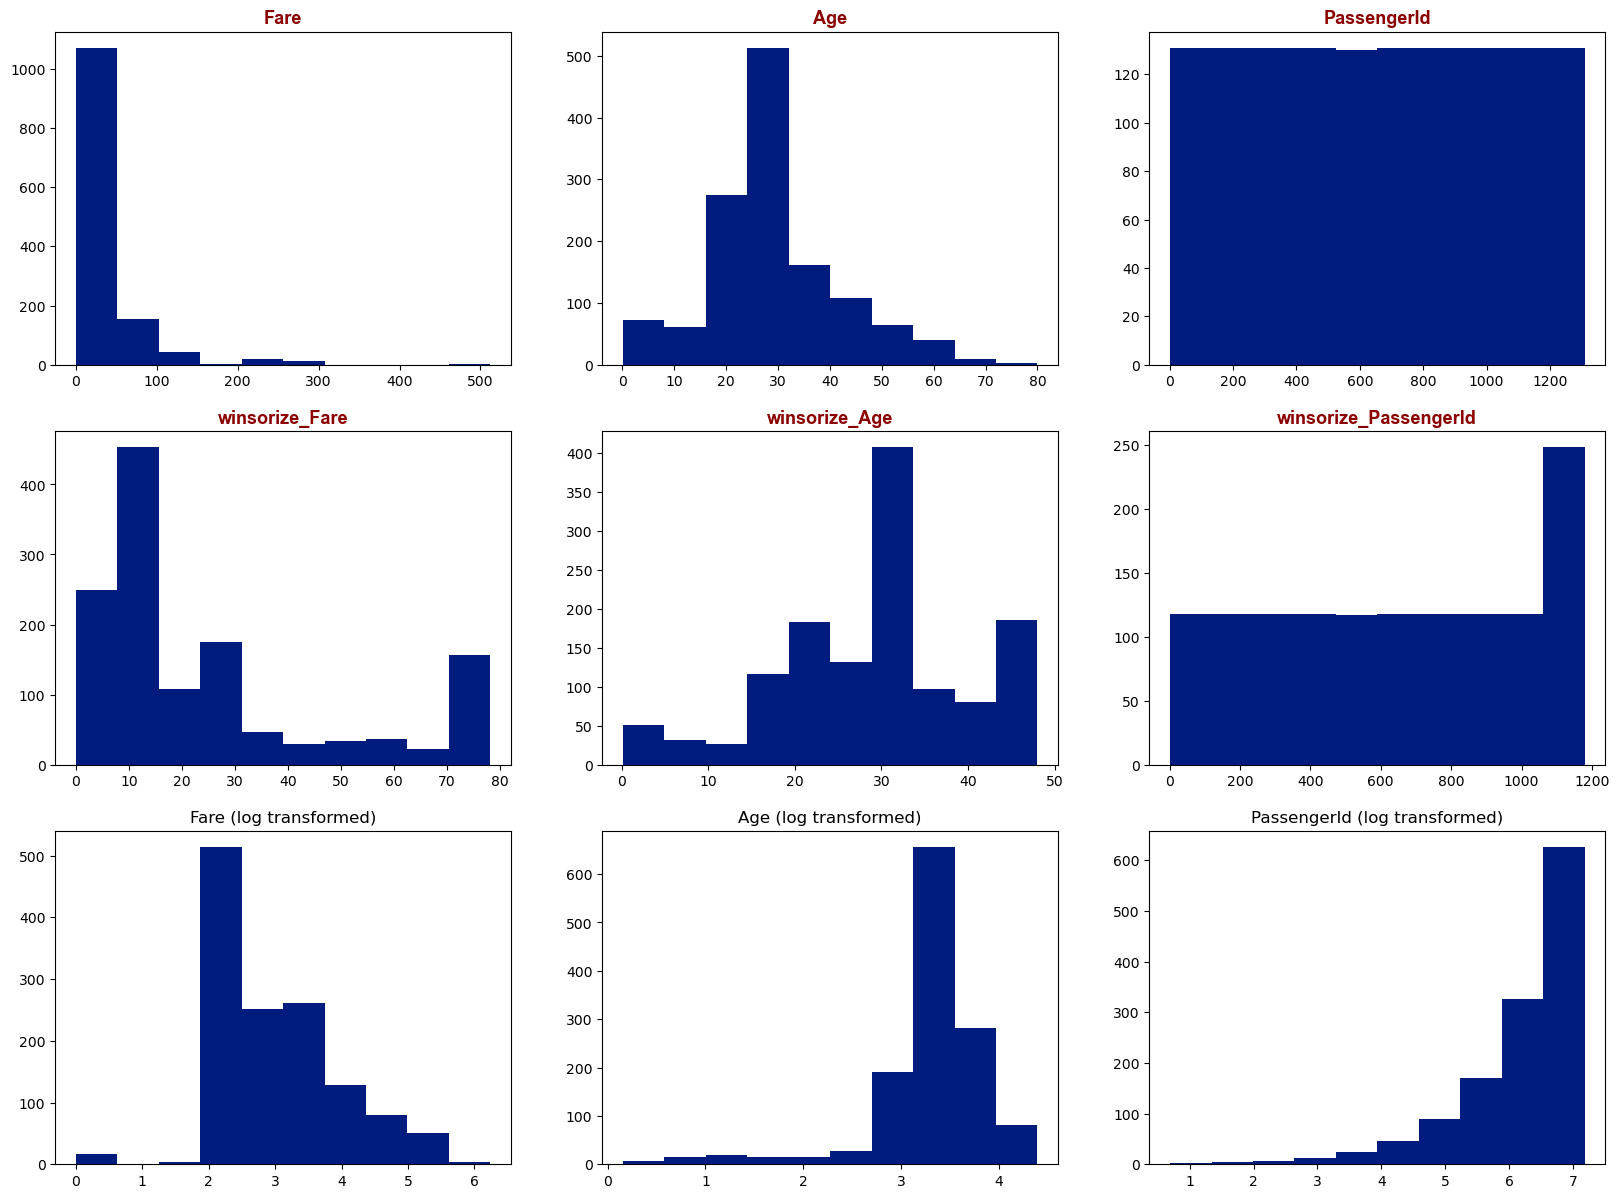

In [310]:
train_df["winsorize_Fare"] = winsorize(train_df["Fare"], (0, 0.10))
train_df["winsorize_Age"] = winsorize(train_df["Age"], (0, 0.10))
train_df["winsorize_PassengerId"] = winsorize(train_df["PassengerId"], (0, 0.10))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

variables = ['Fare', 'Age' , 'PassengerId']
winsorize_variables= ['winsorize_Fare', 'winsorize_Age', 'winsorize_PassengerId']
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(train_df[variables[i]])
    plt.title(variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(train_df[winsorize_variables[i]])
    plt.title(winsorize_variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(3, 3, i+7)
    plt.hist(np.log(train_df[variables[i]]+1))
    plt.title(variables[i] + ' (log transformed)')

Visualization of the Categorical Variables

In [311]:
#!pip install wordcloud

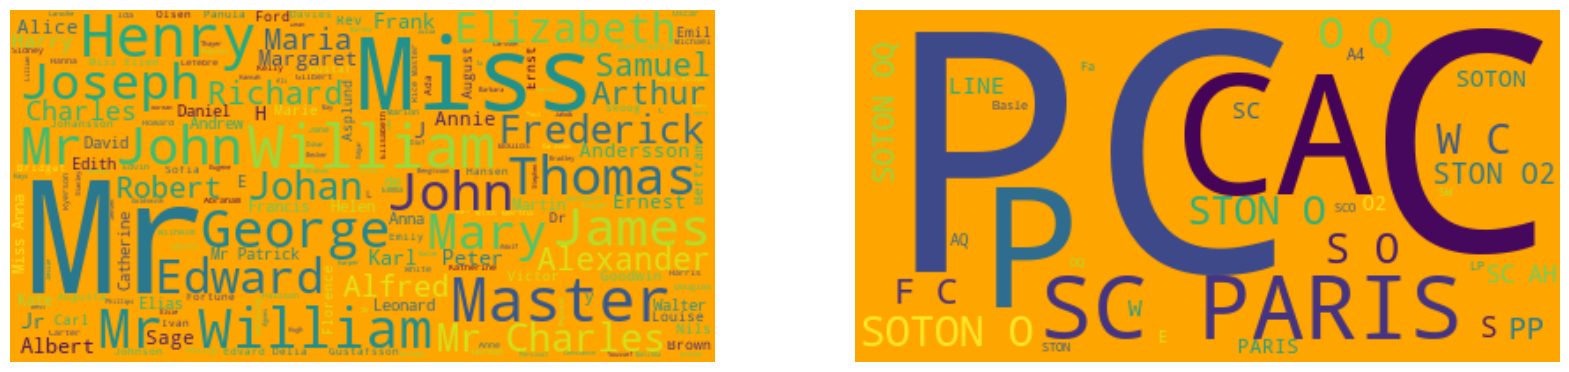

In [312]:
from wordcloud import WordCloud
categories=['Name','Ticket']
plt.figure(figsize=(20,10))
for i, category in enumerate(categories):
    plt.subplot(1,2,i+1)
    wordcloud = WordCloud(background_color="orange").generate(" ".join(train_df[category].dropna()))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
plt.show()

**Bivariate Analysis of Two Continuous Variables**

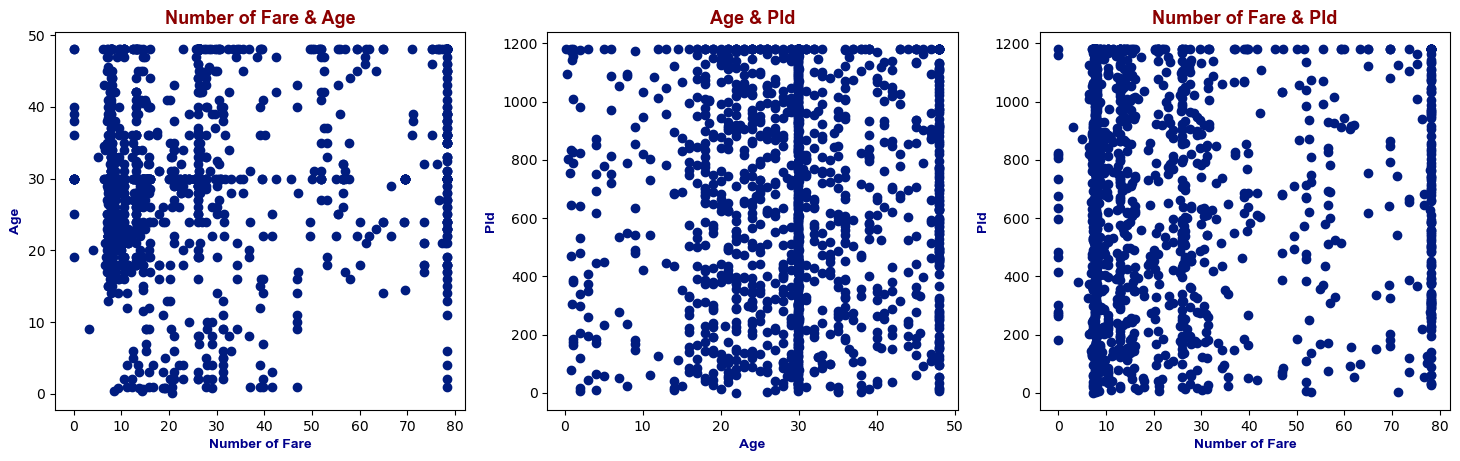

In [313]:
plt.figure(figsize=(18,5))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(train_df["winsorize_Fare"], train_df["winsorize_Age"])
plt.title("Number of Fare & Age", fontdict=title_font)
plt.xlabel('Number of Fare', fontdict=axis_font )
plt.ylabel('Age', fontdict=axis_font )


plt.subplot(1,3,2)
plt.scatter(train_df["winsorize_Age"], train_df["winsorize_PassengerId"])
plt.title("Age & PId", fontdict=title_font)
plt.xlabel('Age', fontdict=axis_font)
plt.ylabel('PId', fontdict=axis_font)

plt.subplot(1,3,3)
plt.scatter(train_df["winsorize_Fare"], train_df["winsorize_PassengerId"])
plt.title("Number of Fare & PId", fontdict=title_font)
plt.xlabel('Number of Fare', fontdict=axis_font )
plt.ylabel('PId', fontdict=axis_font )

plt.show()

=>>> The graphs above tells us that there is no clear pattern between the variables of interest.

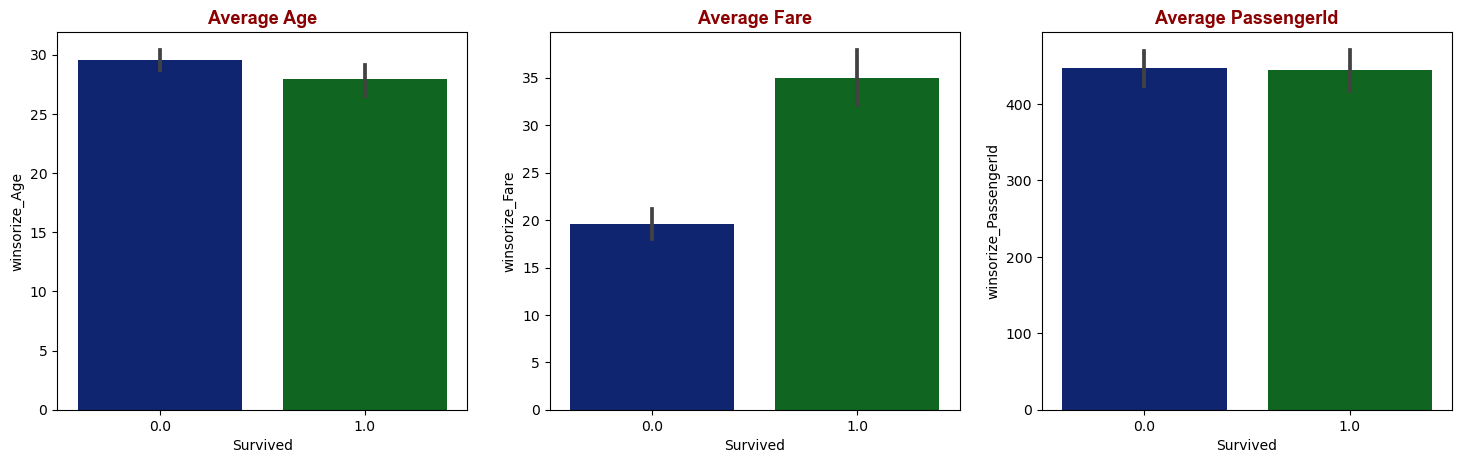

In [314]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(train_df["Survived"], train_df["winsorize_Age"])
plt.title("Average Age", fontdict = title_font)

plt.subplot(1,3,2)
sns.barplot(train_df["Survived"], train_df["winsorize_Fare"])
plt.title("Average Fare", fontdict = title_font)

plt.subplot(1,3,3)
sns.barplot(train_df["Survived"], train_df["winsorize_PassengerId"])
plt.title("Average PassengerId", fontdict = title_font)

plt.show()

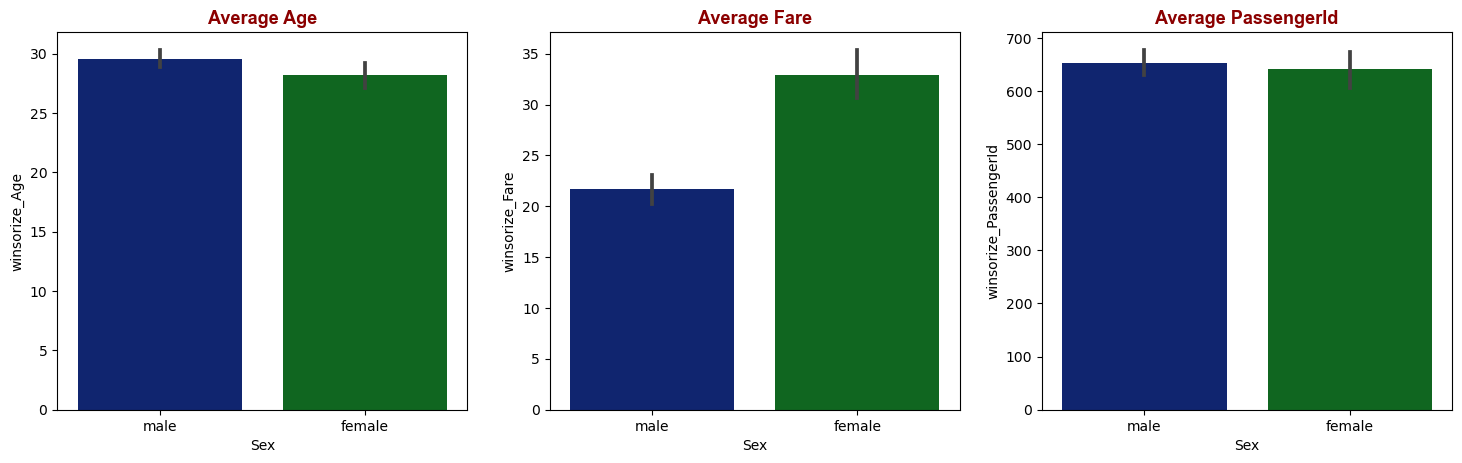

In [315]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(train_df["Sex"], train_df["winsorize_Age"])
plt.title("Average Age", fontdict = title_font)

plt.subplot(1,3,2)
sns.barplot(train_df["Sex"], train_df["winsorize_Fare"])
plt.title("Average Fare", fontdict = title_font)

plt.subplot(1,3,3)
sns.barplot(train_df["Sex"], train_df["winsorize_PassengerId"])
plt.title("Average PassengerId", fontdict = title_font)

plt.show()

**t-test**

In [316]:
train_df.dropna(inplace=True)

In [317]:
# Test whether group differences are significant.
train_dfs = train_df["Survived"].unique()
grup_train = train_df.groupby("Survived")

In [318]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["winsorize_PassengerId", "winsorize_Age", "winsorize_Fare"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(train_dfs)):
        for j in range(i+1, len(train_dfs)):
            ttest = stats.ttest_ind(train_df[train_df["Survived"]==train_dfs[i]][var], 
                                train_df[train_df["Survived"]==train_dfs[j]][var])
            group_1 = train_dfs[i]
            group_2 = train_dfs[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison winsorize_PassengerId

,group_1,group_2,statistic,p_value
0,0.000000000000000,1.000000000000000,0.149280984274850,0.881365776879806


For the sake of comparison winsorize_Age

,group_1,group_2,statistic,p_value
0,0.000000000000000,1.000000000000000,2.103871180048698,0.035670042795122


For the sake of comparison winsorize_Fare

,group_1,group_2,statistic,p_value
0,0.000000000000000,1.000000000000000,-10.027982391858734,0.000000000000000


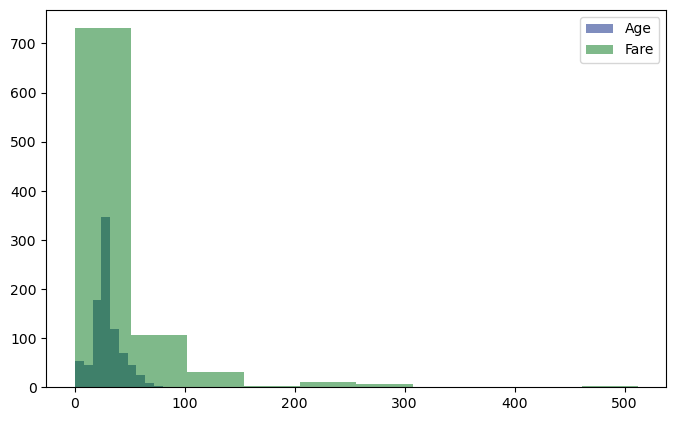

In [319]:
plt.figure(figsize=(8,5))

age = train_df.Age
fare = train_df.Fare

plt.hist(age, alpha=0.5, label='Age') 
plt.hist(fare, alpha=0.5, label='Fare') 
plt.legend(loc='upper right') 
plt.show()

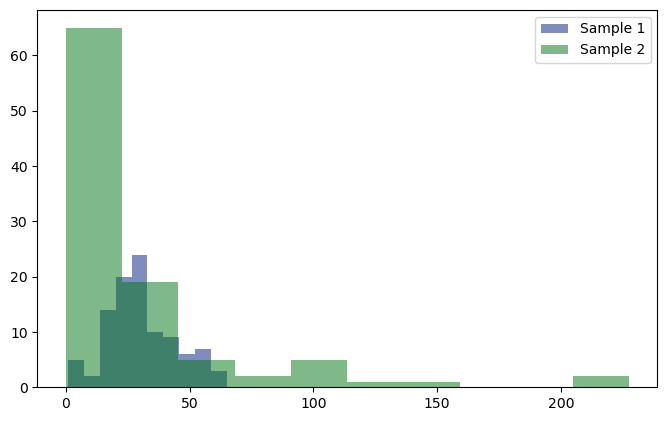

In [320]:
plt.figure(figsize=(8,5))

sample1 = np.random.choice(age, 100, replace=True)
sample2 = np.random.choice(fare, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='Sample 1') 
plt.hist(sample2, alpha=0.5, label='Sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [321]:
print("1. Mean of the sample: ", sample1.mean())
print("2. Mean of the sample : ", sample2.mean())
print("1. Standard deviation of sample: ", sample1.std())
print("2. Standard deviation of sample : ", sample2.std())

1. Mean of the sample:  30.962170650095594
2. Mean of the sample :  29.07370700000001
1. Standard deviation of sample:  13.884212144670458
2. Standard deviation of sample :  39.814114157012845


In [322]:
difference = sample2.mean() - sample1.mean()
print(difference)

-1.8884636500955843


**Correlation Coefficient**

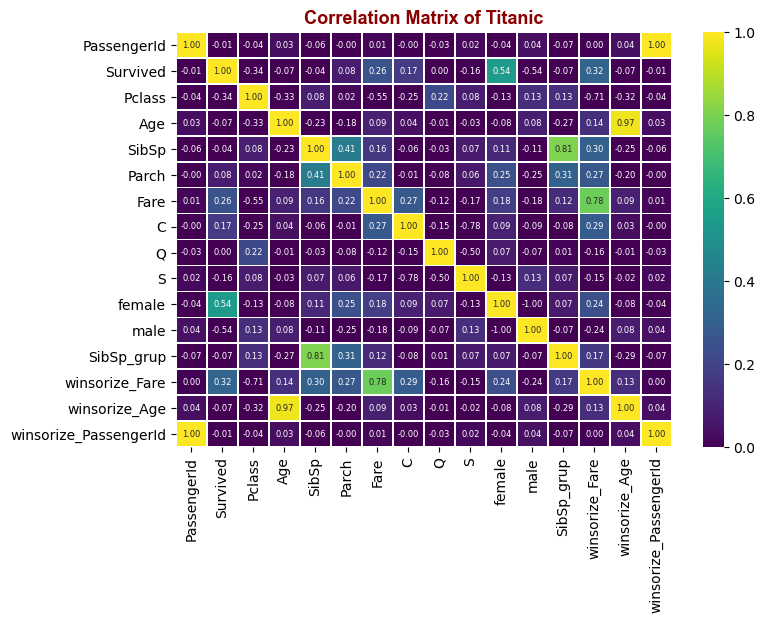

In [323]:
train_df_map=train_df.corr()
sns.heatmap(train_df_map, annot=True, fmt='.2f', annot_kws={"size": 6}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix of Titanic", fontdict=title_font)

plt.show()